# Data Analytics for New Jersey
Load the files and libraries

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [6]:
nj_counties = gpd.read_file("/content/drive/MyDrive/Summer 2024/Aresty/County_Boundaries_of_NJ/County_Boundaries_of_NJ.shp")
print(nj_counties.head())
print(nj_counties.shape)

   OBJECTID      COUNTY         COUNTY_LAB   CO             GNIS_NAME    GNIS  \
0        22    ATLANTIC    Atlantic County  ATL    County of Atlantic  882270   
1        23      BERGEN      Bergen County  BER      County of Bergen  882271   
2        24  BURLINGTON  Burlington County  BUR  County of Burlington  882272   
3        25      CAMDEN      Camden County  CAM      County of Camden  882273   
4        26    CAPE MAY    Cape May County  CAP    County of Cape May  882274   

  FIPSSTCO FIPSCO          ACRES    SQ_MILES  ...  POP1980  POPDEN2020  \
0    34001      1  390813.840968  610.646627  ...   204615         450   
1    34003      3  153489.661221  239.827596  ...   849843        3985   
2    34005      5  524901.239967  820.158187  ...   362542         563   
3    34007      7  145594.972008  227.492144  ...   471650        2301   
4    34009      9  183125.841721  286.134128  ...    82266         333   

   POPDEN2010  POPDEN2000  POPDEN1990  POPDEN1980        REGION  \
0

In [7]:
biomass_data = pd.read_csv("/content/drive/MyDrive/Summer 2024/Aresty/biomass_imperial.csv")
biomass_data = biomass_data[biomass_data["County"] != "New Jersey"]
biomass_data["COUNTY"] = biomass_data["County"].str.upper()
print(biomass_data.head())
print(biomass_data.shape)

       County  Lignocellulose (dry tons)      Kilogram   Kilogram/hr  \
0    Atlantic                     118397  1.074080e+08  12772.067928   
1      Bergen                      93737  8.503680e+07  10111.872187   
2  Burlington                     214810  1.948724e+08  23172.613424   
3      Camden                      73270  6.646944e+07   7903.996022   
4    Cape May                      90167  8.179815e+07   9726.758692   

   Annual Ethanol (gal/yr)  Price ($/gal)  GWP (kg CO2e/gal)      COUNTY  
0                67.945891       5.729998           2.313083    ATLANTIC  
1                54.235090       6.035959           2.335569      BERGEN  
2               122.996529       5.054266           2.268679  BURLINGTON  
3                42.178204       6.509453           2.357160      CAMDEN  
4                51.573046       6.166610           2.307203    CAPE MAY  
(21, 8)


In [8]:
sludge_data = pd.read_csv("/content/drive/MyDrive/Summer 2024/Aresty/sludge_data_final.csv")
sludge_data = sludge_data[sludge_data["County"] != "New Jersey"]
sludge_data["COUNTY"] = sludge_data["County"].str.upper()
print(sludge_data.head())
print(sludge_data.shape)

       County  Flow MGD      Flow m3/d  Price ($/gal)  Price ($/kg)  \
0    Atlantic   28.6747  108545.496127      13.370741      4.215009   
1      Bergen   91.0790  344771.357390       3.637577      1.146715   
2  Burlington   38.3412  145137.161892       9.837202      3.101092   
3      Camden   54.1250  204885.316250       6.771090      2.134527   
4    Cape May   18.4509   69844.221369      21.062678      6.639825   

   Price ($/m3)  Price ($/MMBTU)  Price ($/MJ)  GWP (lb CO2e/gal)  \
0   3532.177832        32.814397      0.031102          25.646800   
1    960.946756         8.927322      0.008461          15.886063   
2   2598.715178        24.142406      0.022882          22.186879   
3   1788.733633        16.617571      0.015750          19.269474   
4   5564.173478        51.691905      0.048994          33.243275   

   GWP (kg CO2e/kg)  GWP (kg CO2e/m3)  GWP (kg CO2e/MMBTU)  GWP (kg CO2e/MJ)  \
0          3.667267       3073.169464            90.566029          0.085840  

In [9]:
combustion_data = pd.read_csv("/content/drive/MyDrive/Summer 2024/Aresty/combustion_data_final.csv")
combustion_data = combustion_data[combustion_data["County"] != "New Jersey"]
combustion_data["COUNTY"] = combustion_data["County"].str.upper()
print(combustion_data.head())
print(combustion_data.shape)

       County  Sludge (MGD)  Food (tons)  Food (dry tons)  Fog (tons)  \
0    Atlantic       28.6747      4167.79        1041.9475     1927.14   
1      Bergen       91.0790     18757.25        4689.3125    15687.58   
2  Burlington       38.3412     12812.79        3203.1975     6403.09   
3      Camden       54.1250      1899.37         474.8425     3791.09   
4    Cape May       18.4509      1030.38         257.5950    52253.10   

   Fog (dry tons)  Green (dry tons)  Manure (lbs)  Sludge Mass kg/hr  \
0        1567.325            118397    16159645.0       4.522729e+06   
1       12700.442             93737    32430067.5       1.436547e+07   
2        5123.828            214810   165492825.0       6.047382e+06   
3        3034.940             73270    15279265.0       8.536888e+06   
4       46545.255             90167    16385945.0       2.910176e+06   

   Sludge Electricity (MWH)  ...  Fog Avoided Emissions Percentage  \
0              7.585345e+10  ...                          

# Create a merged data frame
Now that we have loaded all the dataframes, it's time merge them based on COUNTY

In [10]:
nj_counties_merged = nj_counties.merge(biomass_data, on="COUNTY")
nj_counties_merged = nj_counties_merged.merge(sludge_data, on="COUNTY")
nj_counties_merged = nj_counties_merged.merge(combustion_data, on="COUNTY")
print(nj_counties_merged["COUNTY"].unique())
print(len(nj_counties_merged["COUNTY"].unique()))
print(nj_counties_merged.shape)

['ATLANTIC' 'BERGEN' 'BURLINGTON' 'CAMDEN' 'CAPE MAY' 'CUMBERLAND' 'ESSEX'
 'GLOUCESTER' 'HUDSON' 'HUNTERDON' 'MERCER' 'MONMOUTH' 'OCEAN' 'PASSAIC'
 'SALEM' 'SOMERSET' 'SUSSEX' 'UNION' 'WARREN' 'MORRIS' 'MIDDLESEX']
21
(21, 72)


In [11]:
print(nj_counties_merged.columns)

Index(['OBJECTID', 'COUNTY', 'COUNTY_LAB', 'CO', 'GNIS_NAME', 'GNIS',
       'FIPSSTCO', 'FIPSCO', 'ACRES', 'SQ_MILES', 'POP2020', 'POP2010',
       'POP2000', 'POP1990', 'POP1980', 'POPDEN2020', 'POPDEN2010',
       'POPDEN2000', 'POPDEN1990', 'POPDEN1980', 'REGION', 'Shape_Leng',
       'Shape_Area', 'geometry', 'County_x', 'Lignocellulose (dry tons)',
       'Kilogram', 'Kilogram/hr', 'Annual Ethanol (gal/yr)', 'Price ($/gal)_x',
       'GWP (kg CO2e/gal)', 'County_y', 'Flow MGD', 'Flow m3/d',
       'Price ($/gal)_y', 'Price ($/kg)', 'Price ($/m3)', 'Price ($/MMBTU)',
       'Price ($/MJ)', 'GWP (lb CO2e/gal)', 'GWP (kg CO2e/kg)',
       'GWP (kg CO2e/m3)', 'GWP (kg CO2e/MMBTU)', 'GWP (kg CO2e/MJ)', 'County',
       'Sludge (MGD)', 'Food (tons)', 'Food (dry tons)', 'Fog (tons)',
       'Fog (dry tons)', 'Green (dry tons)', 'Manure (lbs)',
       'Sludge Mass kg/hr', 'Sludge Electricity (MWH)',
       'Sludge Avoided Emissions (million metric tonnes)',
       'Sludge Avoided Emissio

## Create NJ county maps for Fermentation


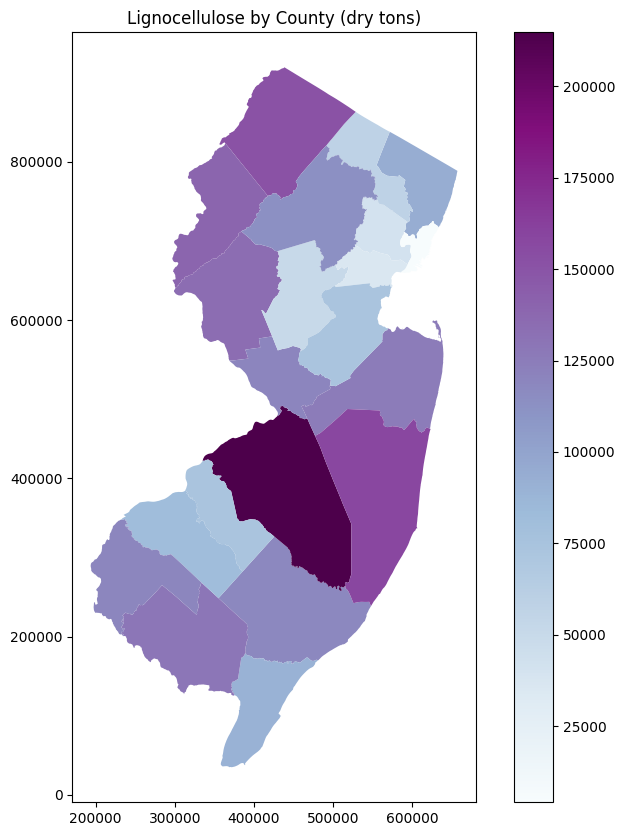

In [29]:
colormap = plt.get_cmap('BuPu')
fig, ax = plt.subplots(figsize=(10, 10))
nj_counties_merged.plot(column="Lignocellulose (dry tons)", cmap=colormap, ax=ax, legend=True)
plt.title("Lignocellulose by County (dry tons)")
plt.show()

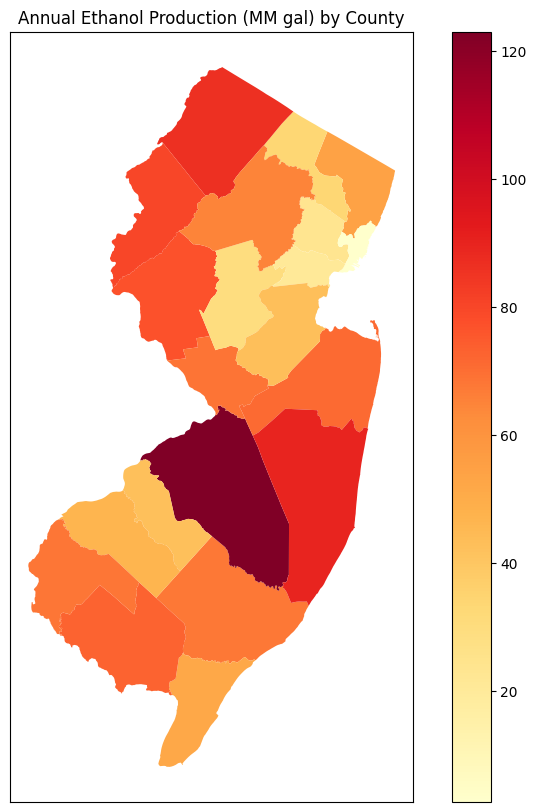

In [22]:
colormap = plt.get_cmap('YlOrRd')
fig, ax = plt.subplots(figsize=(10, 10))
nj_counties_merged.plot(column="Annual Ethanol (gal/yr)", cmap=colormap, ax=ax, legend=True)
plt.title("Annual Ethanol Production (MM gal) by County")
ax.set_xticks([])
ax.set_yticks([])
plt.show()

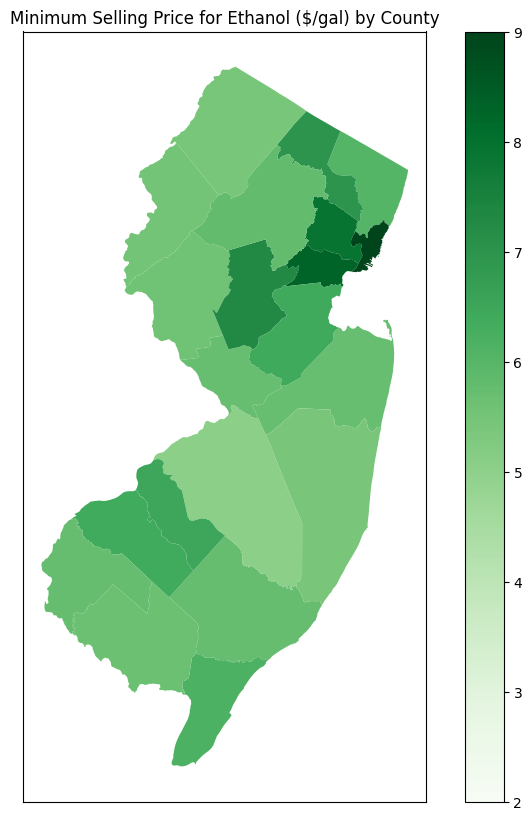

In [23]:
colormap = plt.get_cmap('Greens')
fig, ax = plt.subplots(figsize=(10, 10))
nj_counties_merged.plot(column="Price ($/gal)_x", cmap=colormap, ax=ax, legend=True, vmin=2, vmax=9)
plt.title("Minimum Selling Price for Ethanol ($/gal) by County")
ax.set_xticks([])
ax.set_yticks([])
plt.show()

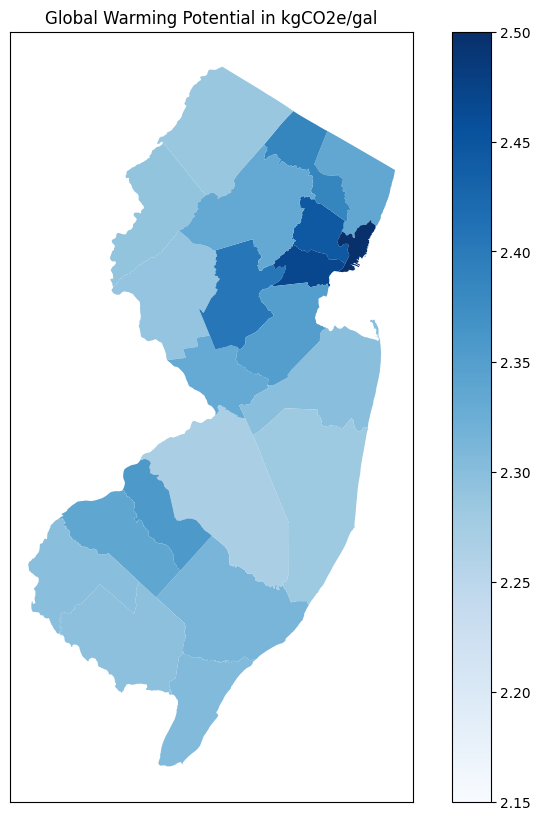

In [24]:
colormap = plt.get_cmap('Blues')
fig, ax = plt.subplots(figsize=(10, 10))
nj_counties_merged.plot(column="GWP (kg CO2e/gal)", cmap=colormap, ax=ax, legend=True, vmin=2.15, vmax=2.5)
plt.title("Global Warming Potential in kgCO2e/gal")
ax.set_xticks([])
ax.set_yticks([])
plt.show()

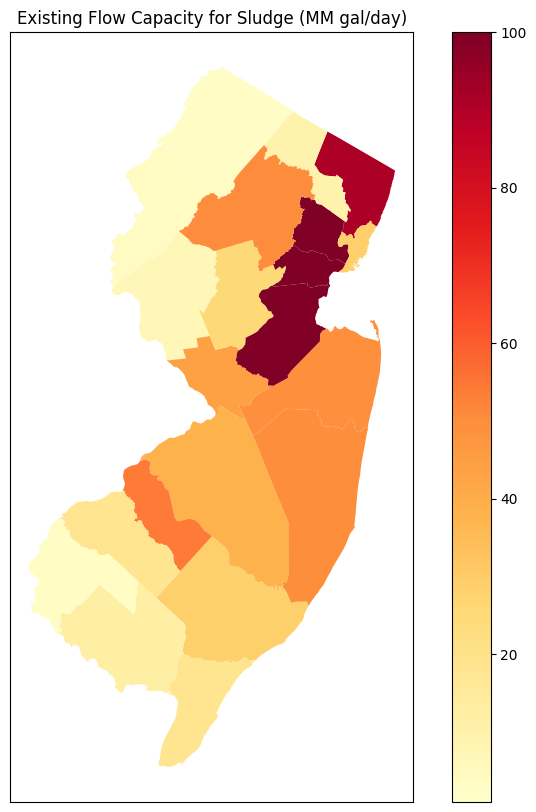

In [35]:
colormap = plt.get_cmap('YlOrRd')
fig, ax = plt.subplots(figsize=(10, 10))
nj_counties_merged.plot(column="Flow MGD", cmap=colormap, ax=ax, legend=True, vmin=1, vmax=100)
plt.title("Existing Flow Capacity for Sludge (MM gal/day)")
ax.set_xticks([])
ax.set_yticks([])
plt.show()

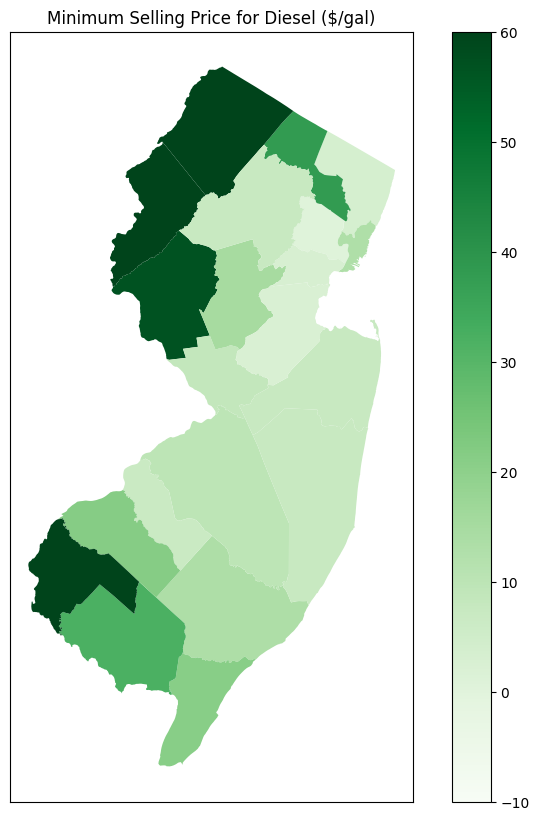

In [42]:
colormap = plt.get_cmap('Greens')
fig, ax = plt.subplots(figsize=(10, 10))
nj_counties_merged.plot(column="Price ($/gal)_y", cmap=colormap, ax=ax, legend=True, vmin=-10, vmax=60)
plt.title("Minimum Selling Price for Diesel ($/gal)")
ax.set_xticks([])
ax.set_yticks([])
plt.show()

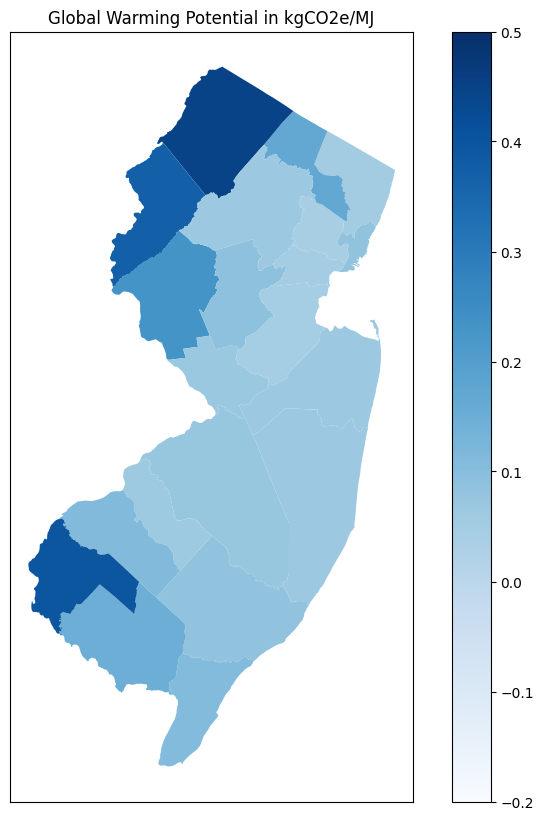

In [50]:
colormap = plt.get_cmap('Blues')
fig, ax = plt.subplots(figsize=(10, 10))
nj_counties_merged.plot(column="GWP (kg CO2e/MJ)", cmap=colormap, ax=ax, legend=True, vmin=-0.2, vmax=0.5)
plt.title("Global Warming Potential in kgCO2e/MJ")
ax.set_xticks([])
ax.set_yticks([])
plt.show()